In [1]:
import sys
import os

import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [2]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + 2 * X**3 + np.random.randn(m, 1) * 10 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

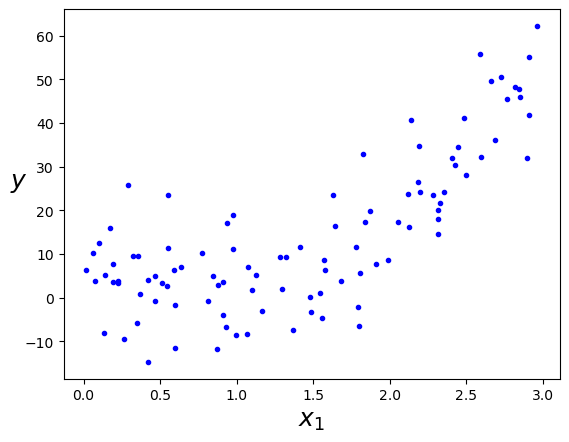

In [3]:
# plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Task 1: Traning and validation MSE

**Task 1:**  Try 1-10th polynomial models and choose appropriate model(s) (You may use `learning_curve` function)


c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 79 instead of 80.
  warnings.warn(


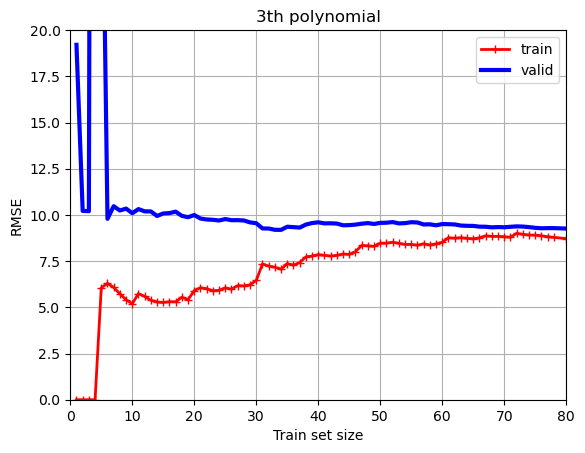

In [4]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.pipeline import make_pipeline

degree = 3
poly_regression = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

train_size, train_scores, valid_scores = learning_curve(
    poly_regression, X, y, train_sizes=np.linspace(0.01, 1, 80),
    cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_size, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_size, valid_errors, 'b-', linewidth=3, label='valid')

plt.title(str(degree) + "th polynomial")

plt.axis([0, 80, 0, 20])
plt.xlabel("Train set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


# Task 2: Regularization

**Task 2**: Try to build a high degree polynomial model with LASSO regularization. Select the best parameter $\alpha$. Print out the coefficients of the LASSO model with the best parameter to see whether some features are deleted. (Write down your conclusion.)

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

proprocessing = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler()
                )

# poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = proprocessing.fit_transform(X)

# params = {'alpha': [0,0.01,0.1,1,10,100, 200, 300, 400]}
# params = {'alpha': [0.01, 0.05, 0.1, 1, 5, 10]}
# params = {'alpha': [0.01, 0.03, 0.05, 0.08, 0.1]}
params = {'alpha': [0.05,0.06, 0.07, 0.08, 0.09, 0.1]}

gridcv_lasso_model = GridSearchCV(Lasso(),params,cv=5)

gridcv_lasso_model.fit(X_poly, y)

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.277e+00, tolerance: 2.442e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.456e+00, tolerance: 2.600e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.42

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]})

In [6]:
gridcv_lasso_model.best_params_

{'alpha': 0.08}

In [7]:
gridcv_lasso_model.best_estimator_.coef_

array([-4.51489905,  0.        , 17.27736522,  3.57553766,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -2.27271933])

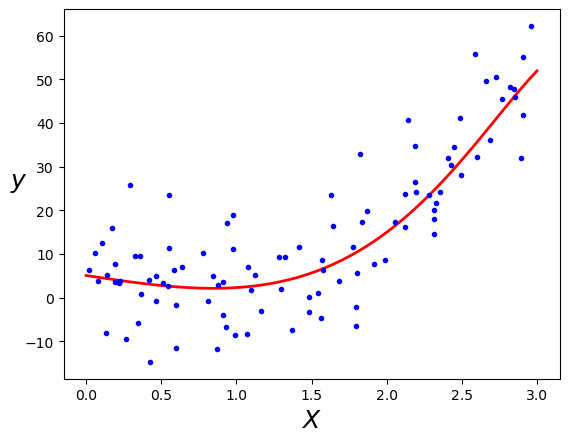

In [8]:
# plt.figure(figsize=(6, 4))

X_new = np.linspace(0, 3, 100).reshape(-1, 1)

X_new_poly = proprocessing.fit_transform(X_new)

y_pred = gridcv_lasso_model.predict(X_new_poly)


plt.plot(X_new, y_pred, 'r-', linewidth=2)

plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()